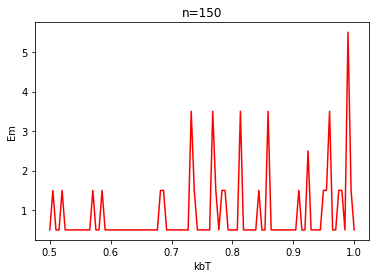

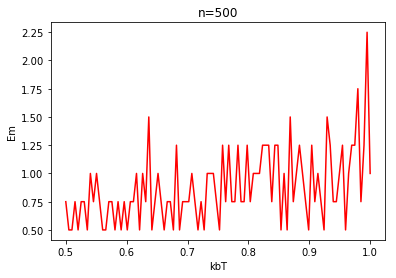

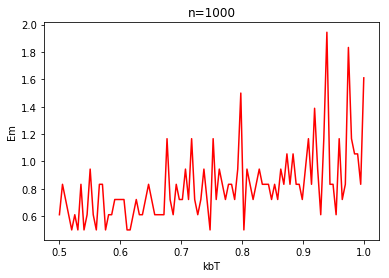

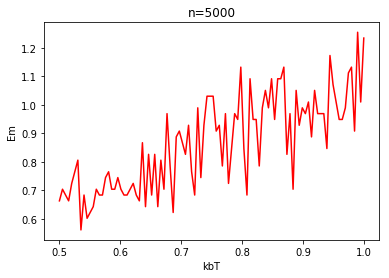

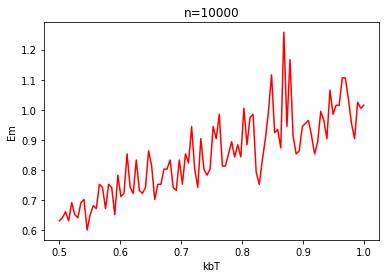

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from random import uniform,randint

def  deltaE(n, kbT):
    n_p=max(n+(-1)**randint(0,1),0)
    dE= hw*(n_p+0.5)-hw*(n+0.5)
    if  dE <= 0.0:
        return n_p
    else:
        r=uniform(0.,1.)
        if np.exp(-dE/kbT) >= r:
            return n_p
        else:
            return  n

def Em(n, hw, kbT, nsample):
    sts=[]
    nsteps = 100
    ct=0
    for i in range(nsample):
        n=deltaE(n, kbT)
        if ct ==nsteps:
            sts.append(n)
            ct=0
        ct+=1
    pr=np.unique(sts,return_counts=True)

    Em = [hw*(pr[0][i]+0.5)*pr[1][i]/len(sts) for i in range(np.shape(pr)[1])]
    return sum(Em)

hw =1.0
kbT =0.5
nsample =1000
n=0

kbT = np.linspace(0.5, 1.0, 100)
nsample = [150, 500, 1000, 5000, 10000]
for j in nsample:
    E = [Em(n, hw, i, j) for i in kbT]
    plt.plot(kbT, E, 'r')
    plt.xlabel("kbT")
    plt.ylabel("Em")
    plt.title("n="+str(j))
    plt.show()